# Demo 1: Indexing

In [1]:
from kan import KAN
import torch
model = KAN(width=[2,3,2,1])
x = torch.normal(0,1,size=(100,2))
model(x);
beta = 100
model.plot(beta=beta)
# [2,3,2,1] means 2 input nodes
# 3 neurons in the first hidden layer,
# 2 neurons in the second hidden layer,
# 1 output node

ModuleNotFoundError: No module named 'kan'

### Indexing of edges (activation functions)

Each activation function is indexed by $(l,i,j)$ where $l$ is the layer index, $i$ is the input neuron index, $j$ is the output neuron index. All of them starts from 0. For example, the one in the bottom left corner is (0, 0, 0). Let's try to make it symbolic and see it turns red.

r2 is 0.9995602360489043


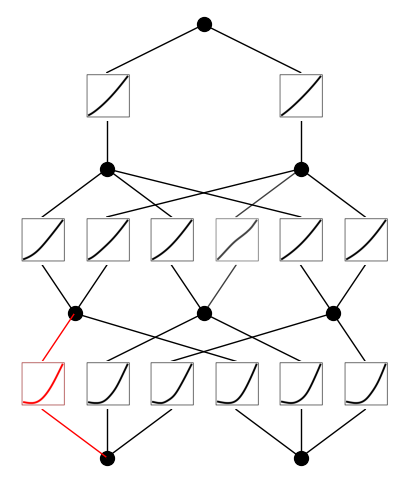

In [2]:
model.fix_symbolic(0,0,0,'sin')
model.plot(beta=beta)
model.unfix_symbolic(0,0,0)

r2 is 0.9992399109543574


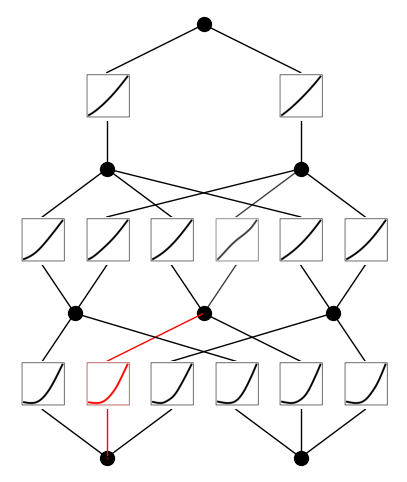

In [3]:
model.fix_symbolic(0,0,1,'sin')
model.plot(beta=beta)
model.unfix_symbolic(0,0,1)

r2 is 0.9973507118333039


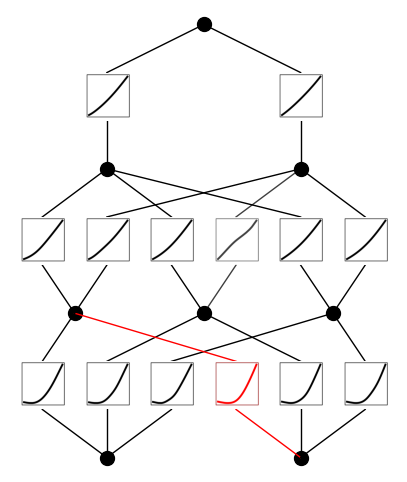

In [4]:
model.fix_symbolic(0,1,0,'sin')
model.plot(beta=beta)
model.unfix_symbolic(0,1,0)

r2 is 0.9999506177136502


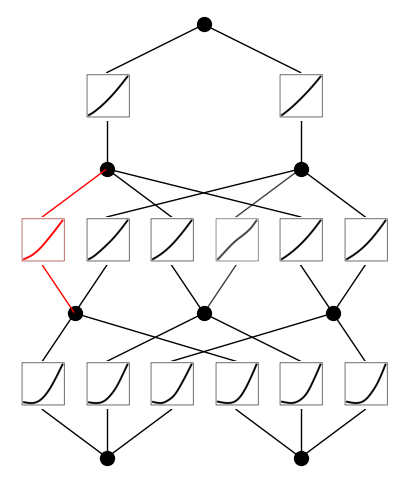

In [5]:
model.fix_symbolic(1,0,0,'sin')
model.plot(beta=beta)
model.unfix_symbolic(1,0,0)

r2 is 0.9999411308602921


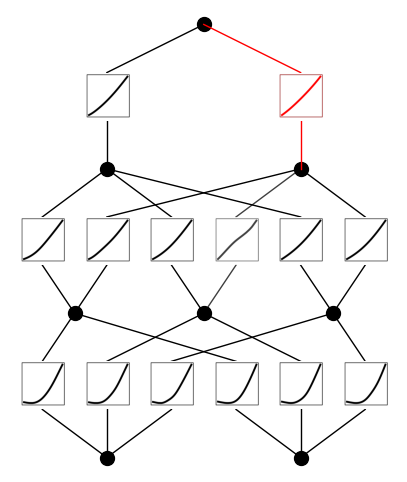

In [6]:
model.fix_symbolic(2,1,0,'sin')
model.plot(beta=beta)
model.unfix_symbolic(2,1,0)

### Indexing of nodes (neurons)

Each neuron (node) is indexed by $(l,i)$ where $l$ is the layer index along depth, $i$ is the neuron index along width. In the function remove_node, we use use $(l,i)$ to indicate which node we want to remove.

In [7]:
model.remove_node(1,0)

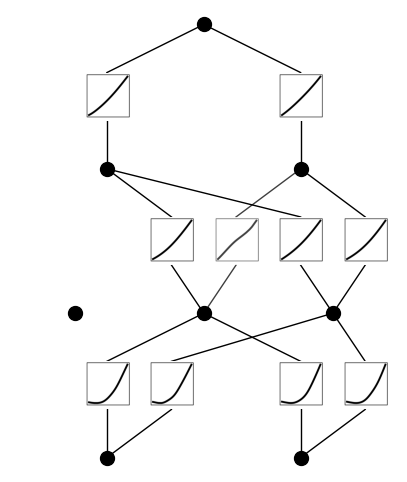

In [8]:
model.plot(beta=beta)

In [9]:
model.remove_node(2,1)

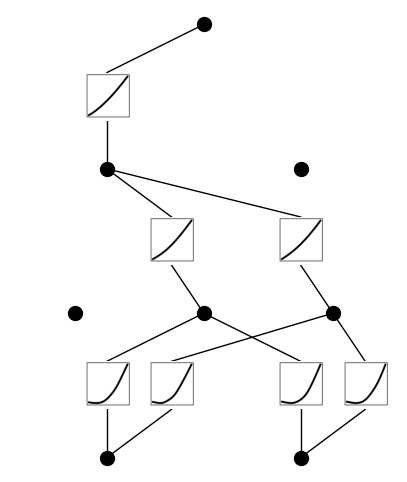

In [10]:
model.plot(beta=beta)

In [11]:
model.remove_node(1,2)

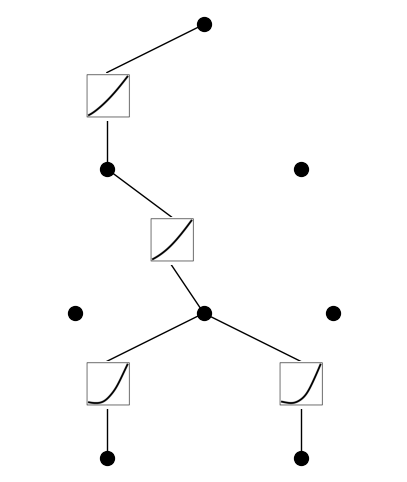

In [12]:
model.plot(beta=beta)

### Indexing of layers

In [13]:
# KAN spline layers are refererred to as act_fun
# KAN symbolic layers are referred to as symbolic_fun

model = KAN(width=[2,3,2,1])

i = 0
model.act_fun[i] # => KAN Layer (Spline)
model.symbolic_fun[i] # => KAN Layer (Symbolic)

for i in range(3):
    print(model.act_fun[i].in_dim, model.act_fun[i].out_dim)
    print(model.symbolic_fun[i].in_dim, model.symbolic_fun[i].out_dim)

2 3
2 3
3 2
3 2
2 1
2 1


In [14]:
# check model parameters
model.act_fun[i].grid
model.act_fun[i].coef
model.symbolic_fun[i].funs_name
model.symbolic_fun[i].mask

Parameter containing:
tensor([[0., 0.]])